In [28]:
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [39]:
print(__versions)

NameError: name '__versions' is not defined

Database Connection

In [2]:
db_username = 'postgres'
db_password = 'root'
db_host = 'localhost'
db_port = '5432'
db_name = 'week2'

connection_string = f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_string)

data = pd.read_sql("SELECT * FROM xdr_data", engine)
data.head(2)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0


In [3]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


Task 1 - User Overview Analysis 

In [4]:
top_handsets = data['Handset Type'].value_counts().head(10)

# printout  top 10 manufacturers
print("Top 10 Handsets Used by Customers:")
print(top_handsets)

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


Top 3 Handset Manufacturers

In [5]:
top_manufacturers = data['Handset Manufacturer'].value_counts().head(3)

# printout top 3 manufacturers
print("\nTop 3 Handset Manufacturers:")
print(top_manufacturers)


Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [6]:
top_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
top_manufacturer_names = list(top_manufacturers.index)
top_manufacturer_names

top_handsets_per_manufacturer = {}

for manufacturer in top_manufacturer_names:
    top_handsets_per_manufacturer[manufacturer] = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

# printout the results
print("\nTop 5 Handsets per Top 3 Manufacturers:")
for manufacturer, handsets in top_handsets_per_manufacturer.items():
    print(f"{manufacturer}:")
    print(handsets)


Top 5 Handsets per Top 3 Manufacturers:
Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64
Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64
Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


**1. Interpretation**


- The analysis reveals that Apple’s top-selling handsets, particularly the iPhone 6S and iPhone 6, indicate strong demand for older models, suggesting consumer preference for affordability within the brand. Samsung’s Galaxy S8 and the popular J series highlight a successful balance between premium and budget-friendly options, while Huawei’s B528S-23A stands out with exceptional sales, pointing to a niche market for specific use cases like home internet.


**2. Recommendations**


- To capitalize on these insights, Apple should focus marketing on refurbished and older models to attract cost-conscious consumers. Samsung should emphasize the features of the Galaxy S8 and J series in marketing and consider bundling offers. For Huawei, increasing visibility for the B528S in targeted campaigns can enhance its market presence. Additionally, maintaining higher inventory levels for these popular models and implementing loyalty programs can strengthen customer engagement and drive repeat sales.

Task 1.1 Aggregate user behavior

In [7]:
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])

# Calculate session duration in milliseconds
data['Dur. (ms)'] = (data['End'] - data['Start']).dt.total_seconds() * 1000

# Aggregate user behavior
user_overview = data.groupby('MSISDN/Number').agg(
    number_of_sessions=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_download_data=('Total DL (Bytes)', 'sum'),
    total_upload_data=('Total UL (Bytes)', 'sum'),
    total_data_volume=('Total DL (Bytes)', lambda x: x.sum() + data['Total UL (Bytes)'].sum())
).reset_index()

# printout the aggregated overview
user_overview

,MSISDN/Number,number_of_sessions,total_session_duration,total_download_data,total_upload_data,total_data_volume
0,3.360100e+10,1,116760000.0,8.426375e+08,36053108.0,6.169024e+12
1,3.360100e+10,1,181260000.0,1.207552e+08,36104459.0,6.168302e+12
2,3.360100e+10,1,135000000.0,5.566597e+08,39306820.0,6.168738e+12
3,3.360101e+10,1,49920000.0,4.019932e+08,20327526.0,6.168583e+12
4,3.360101e+10,2,37200000.0,1.363130e+09,94280527.0,6.169544e+12
...,...,...,...,...,...,...
106851,3.379000e+10,1,8760000.0,6.879252e+08,26716429.0,6.168869e+12
106852,3.379000e+10,1,141000000.0,4.445751e+08,35732243.0,6.168626e+12
106853,3.197021e+12,1,877380000.0,1.948281e+08,37295915.0,6.168376e+12
106854,3.370000e+14,1,253020000.0,5.396350e+08,56652839.0,6.168721e+12


Task 1.2 - Exploratory Data Analysis (EDA)

In [8]:
#Describe data
data_info = data.info()
# data_description = data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

**Data Cleaning**
- Check Missing
- Handling Missing Values

In [9]:
missing_values = data.isnull().sum()
missing_values

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [10]:
#for numeric type
numeric_data = data.select_dtypes(exclude='object')
data.fillna(numeric_data.mean(), inplace=True)

#for object type mode
cat_data = data.select_dtypes(exclude='number')
data.fillna(cat_data.mode().iloc[0], inplace=True)

Check the missings after handled

In [11]:
data.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

Identifying and Treating Outliers

In [12]:
from scipy import stats
import numpy as np

data_z = data[(np.abs(stats.zscore(data.select_dtypes(include=[np.number]))) < 3).all(axis=1)]
data_z

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
62,1.304243e+19,2019-04-21 02:55:00.000000000,73.0000,2019-04-25 00:17:00.000000000,262.00000,336120000.0,2.082018e+14,3.376353e+10,8.637690e+13,D72939C,...,2.283372e+07,1.095163e+07,1.842684e+07,8.632677e+06,5.769982e+08,9.724918e+06,4.469798e+08,1.406720e+07,4.679761e+07,6.326003e+08
65,1.311448e+19,2019-04-21 08:26:00.000000000,605.0000,2019-04-25 01:20:00.000000000,655.00000,320040000.0,2.082017e+14,3.366364e+10,3.564211e+13,L11120C,...,1.207428e+07,1.236396e+07,2.057439e+07,6.242250e+05,5.524130e+08,1.112977e+06,1.420919e+08,1.299874e+06,1.826125e+07,5.972447e+08
66,7.349883e+18,2019-04-21 08:54:00.000000000,105.0000,2019-04-25 00:48:00.000000000,931.00000,316440000.0,2.082019e+14,3.366010e+10,3.579881e+13,L11864B,...,5.550520e+06,2.067076e+07,1.922711e+07,1.378948e+07,5.074195e+08,9.991757e+06,3.485655e+08,3.391925e+06,5.006510e+07,5.388091e+08
67,1.311448e+19,2019-04-21 09:19:00.000000000,590.0000,2019-04-25 04:42:00.000000000,965.00000,328980000.0,2.082021e+14,3.365079e+10,3.575751e+13,D73388C,...,1.018547e+07,1.307914e+07,1.541634e+07,6.144270e+06,1.248167e+08,1.214873e+06,4.838522e+08,6.057834e+06,2.943620e+07,1.621966e+08
68,1.304243e+19,2019-04-21 10:09:00.000000000,1.0000,2019-04-25 01:39:00.000000000,272.00000,315000000.0,2.082014e+14,3.366274e+10,3.528141e+13,T72937C,...,2.219119e+07,1.885190e+07,1.587932e+07,1.065062e+07,4.889126e+07,1.360739e+07,5.252090e+08,6.472727e+06,5.057623e+07,9.336097e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00.000000000,451.0000,2019-04-30 06:02:00.000000000,214.00000,81240000.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,2019-04-29 07:28:00.000000000,483.0000,2019-04-30 10:41:00.000000000,187.00000,97980000.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,2019-04-29 07:28:00.000000000,283.0000,2019-04-30 10:46:00.000000000,810.00000,98280000.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,2019-04-29 07:28:00.000000000,696.0000,2019-04-30 10:40:00.000000000,327.00000,97920000.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


**Variable Transformations**
- Segment Users into Deciles

In [13]:
# Calculate total duration for all sessions
data['Total Duration'] = data['Dur. (ms)']

# Segment users into deciles
data['Decile Class'] = pd.qcut(data['Total Duration'], 5, labels=False)

# Compute total DL + UL per decile class
data['Total DL+UL'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
decile_summary = data.groupby('Decile Class')['Total DL+UL'].sum().reset_index()
decile_summary

,Decile Class,Total DL+UL
0,0,1.488987e+13
1,1,2.701440e+13
2,2,2.702940e+12
3,3,1.485795e+13
4,4,1.490004e+13


 Basic Metrics Analysis

In [14]:
# Compute basic metrics
metrics = data.describe()
metrics

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Duration,Decile Class,Total DL+UL
count,1.500010e+05,150001,150001.000000,150001,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05
mean,1.013887e+19,2019-04-26 12:36:09.616800256,499.188200,2019-04-27 17:39:38.703200256,498.800880,1.046091e+08,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,...,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,1.046091e+08,1.835754,4.957646e+08
min,6.917538e+18,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,7.140000e+06,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,...,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,7.140000e+06,0.000000,2.895611e+07
25%,7.349883e+18,2019-04-25 00:26:00,250.000000,2019-04-26 07:30:00,251.000000,5.742000e+07,2.082014e+14,3.365151e+10,3.546261e+13,35.000000,...,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08,5.742000e+07,1.000000,2.844764e+08
50%,7.349883e+18,2019-04-26 08:51:00,499.000000,2019-04-27 23:02:00,500.000000,8.640000e+07,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,...,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08,8.640000e+07,1.000000,4.968610e+08
75%,1.304243e+19,2019-04-27 18:18:00,749.000000,2019-04-29 07:15:00,750.000000,1.324200e+08,2.082018e+14,3.368473e+10,8.611970e+13,109.795706,...,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08,1.324200e+08,3.000000,7.065054e+08
max,1.318654e+19,2019-04-29 07:28:00,999.000000,2019-04-30 23:59:00,999.000000,1.859340e+09,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1.859340e+09,4.000000,9.559848e+08
std,2.883600e+18,NaN,288.610872,NaN,288.096693,8.103738e+07,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,...,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,8.103738e+07,1.461539,2.443810e+08


**Univariate Analysis**
- Non-Graphical Analysis

In [15]:
# Compute dispersion parameters
dispersion_params = data.select_dtypes(include=[np.number]).agg(['mean', 'median', 'std', 'min', 'max'])
dispersion_params

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total Duration,Decile Class,Total DL+UL
mean,1.013887e+19,499.188200,498.800880,1.046091e+08,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,1.046091e+08,1.835754,4.957646e+08
median,7.349883e+18,499.000000,500.000000,8.640000e+07,2.082015e+14,3.366380e+10,3.572241e+13,54.000000,7.000000,63.000000,...,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08,8.640000e+07,1.000000,4.968610e+08
std,2.883600e+18,288.610872,288.096693,8.103738e+07,2.144722e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,...,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,8.103738e+07,1.461539,2.443810e+08
min,6.917538e+18,0.000000,0.000000,7.140000e+06,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,7.140000e+06,0.000000,2.895611e+07
max,1.318654e+19,999.000000,999.000000,1.859340e+09,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1.859340e+09,4.000000,9.559848e+08


- Graphical Analysis for  potential outliers

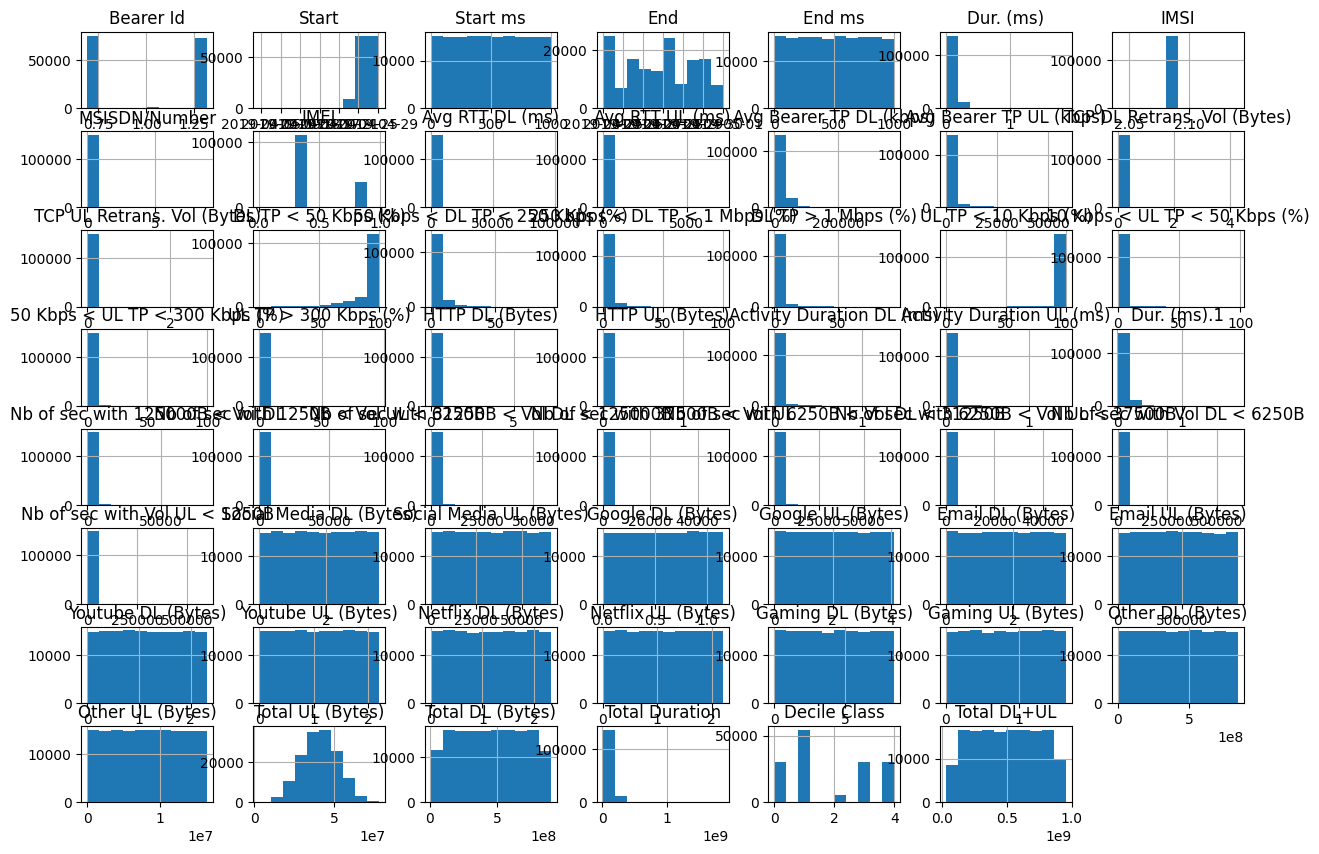

In [18]:
# Histograms for numerical variables
data.hist(figsize=(15, 10))
plt.show();

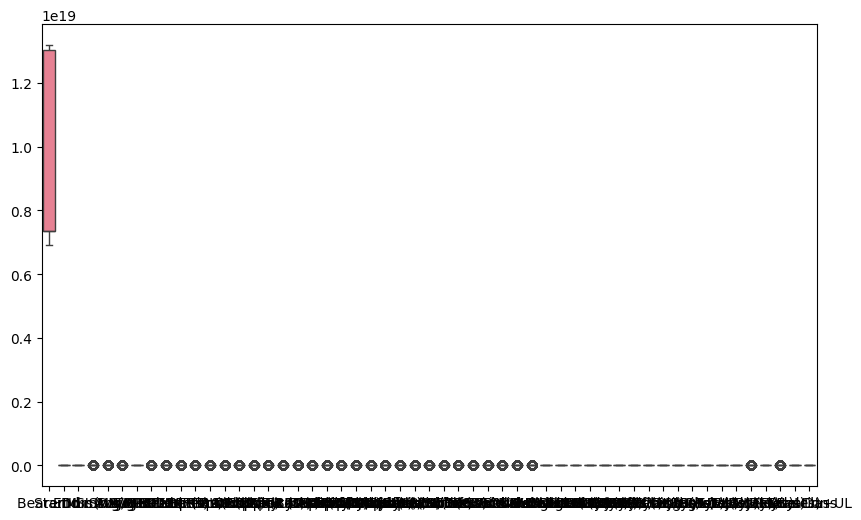

In [19]:
# Box plots for potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.show();

**Bivariate Analysis**
- Relationship with Total DL+UL Data

In [29]:
print(data.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


 **Correlation Analysis - bivariate_analysis**

In [32]:
correlation_columns = [
    'Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
    'Other DL (Bytes)', 'Total DL+UL'
]

correlation_matrix = data[correlation_columns].corr()
correlation_matrix['Total DL+UL']

Social Media DL (Bytes)    0.005380
Google DL (Bytes)          0.012108
Email DL (Bytes)           0.004283
Youtube DL (Bytes)         0.025642
Netflix DL (Bytes)         0.024331
Gaming DL (Bytes)          0.998068
Other DL (Bytes)          -0.002795
Total DL+UL                1.000000
Name: Total DL+UL, dtype: float64

**Dimensionality Reduction**
- Principal Component Analysis (PCA)

In [27]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

scaled_data = StandardScaler().fit_transform(data.select_dtypes(include=[np.number]))

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
principal_components

array([[-6.92775535, 30.25852663],
       [-5.40466858, 22.35406175],
       [-5.41116271, 22.31303458],
       ...,
       [-1.29181614,  0.28858151],
       [-0.88673316,  0.3330336 ],
       [-0.09897509,  0.32051805]])